<a href="https://colab.research.google.com/github/Chinmayi-Bachu/Object_detection/blob/main/video_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics -q
!apt-get update -qq
!apt-get install -y ffmpeg -qq

print("Environment setup complete: Ultralytics and ffmpeg installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelea

Upload image

In [2]:
from google.colab import files
import os

# Create a directory to store uploaded images
IMAGE_UPLOAD_DIR = "uploaded_images_part_a"
os.makedirs(IMAGE_UPLOAD_DIR, exist_ok=True)

print(f"Please upload your images now. They will be saved to '{IMAGE_UPLOAD_DIR}'.")
uploaded = files.upload()

for filename in uploaded.keys():
    # Move uploaded files to the designated directory
    os.rename(filename, os.path.join(IMAGE_UPLOAD_DIR, filename))
    print(f"Uploaded and moved: {filename}")

# Verify images are in the directory
image_files = [f for f in os.listdir(IMAGE_UPLOAD_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
print(f"Found {len(image_files)} images in '{IMAGE_UPLOAD_DIR}' for segmentation.")

Please upload your images now. They will be saved to 'uploaded_images_part_a'.


Saving pic1.jpeg to pic1.jpeg
Uploaded and moved: pic1.jpeg
Found 1 images in 'uploaded_images_part_a' for segmentation.


Segmentation Code

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 73.2MB/s]


Starting segmentation for 1 images...

image 1/1 /content/uploaded_images_part_a/pic1.jpeg: 448x640 23 cars, 12 buss, 1 truck, 525.3ms
Speed: 17.8ms preprocess, 525.3ms inference, 186.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to colab_segmentation_output/individual_images_segmented

Segmentation complete for individual images. Outputs saved to: colab_segmentation_output/individual_images_segmented

Displaying a sample of segmented images:
--- pic1.jpg ---


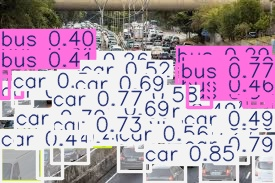

In [3]:
from ultralytics import YOLO
import os

# Load a pre-trained YOLOv8 segmentation model
# 'yolov8n-seg.pt' is a good balance of speed and accuracy.
# If you need more accuracy and have time, consider 'yolov8s-seg.pt' or 'yolov8m-seg.pt'.
model = YOLO('yolov8n-seg.pt')

# --- Segmentation Logic ---
# The IMAGE_UPLOAD_DIR from the previous cell will be used.

if not image_files:
    print("No images found to segment in 'uploaded_images_part_a'. Please upload images in the previous step.")
else:
    print(f"Starting segmentation for {len(image_files)} images...")

    # Perform prediction (segmentation)
    # Colab will save outputs to 'runs/segment/predict' by default.
    # We add a custom project/name for better organization if you run this multiple times.
    results = model.predict(
        source=IMAGE_UPLOAD_DIR,
        save=True,          # Save segmented images
        conf=0.25,          # Confidence threshold
        iou=0.7,            # IOU threshold
        project='colab_segmentation_output', # Custom project folder
        name='individual_images_segmented' # Custom subfolder name
    )

    # The actual output directory where Ultralytics saves the results
    # is usually available via model.predictor.save_dir after a run.
    segmented_images_output_dir = os.path.join('colab_segmentation_output', 'individual_images_segmented')
    print(f"\nSegmentation complete for individual images. Outputs saved to: {segmented_images_output_dir}")

    # Display some of the segmented images (optional)
    from IPython.display import Image, display
    print("\nDisplaying a sample of segmented images:")
    sample_images = [f for f in os.listdir(segmented_images_output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for i, img_name in enumerate(sample_images[:5]): # Display up to 5 images
        print(f"--- {img_name} ---")
        display(Image(filename=os.path.join(segmented_images_output_dir, img_name), width=400))
        if i == 4:
            break

Upload Video and Split into Frames

In [4]:
from google.colab import files
import os
import subprocess

VIDEO_UPLOAD_DIR = "uploaded_video"
FRAMES_OUTPUT_FOLDER = "video_frames"
os.makedirs(VIDEO_UPLOAD_DIR, exist_ok=True)
os.makedirs(FRAMES_OUTPUT_FOLDER, exist_ok=True)

print("Please upload your video file now.")
uploaded_video = files.upload()

video_filename = None
for filename in uploaded_video.keys():
    # Assuming only one video file is uploaded
    video_filename = filename
    os.rename(filename, os.path.join(VIDEO_UPLOAD_DIR, video_filename))
    print(f"Uploaded and moved video: {video_filename}")
    break

if video_filename:
    VIDEO_PATH = os.path.join(VIDEO_UPLOAD_DIR, video_filename)

    # --- FFmpeg Command to Extract Frames ---
    # Adjust fps as needed. A higher fps means more frames and longer processing.
    # For a 10-second video, 5 fps means 50 frames.
    FRAME_EXTRACTION_FPS = 5

    ffmpeg_command = [
        "ffmpeg",
        "-i", VIDEO_PATH,
        "-vf", f"fps={FRAME_EXTRACTION_FPS}",
        os.path.join(FRAMES_OUTPUT_FOLDER, "frame_%04d.png") # %04d for 4-digit padding
    ]

    print(f"\nExecuting FFmpeg command to extract frames ({FRAME_EXTRACTION_FPS} fps): {' '.join(ffmpeg_command)}")
    try:
        # Use capture_output=True to get stdout/stderr for debugging
        result = subprocess.run(ffmpeg_command, check=True, capture_output=True, text=True)
        print(f"Successfully extracted frames to: {FRAMES_OUTPUT_FOLDER}")
        # print("FFmpeg stdout:\n", result.stdout) # Uncomment for detailed ffmpeg output
        # print("FFmpeg stderr:\n", result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames: {e}")
        print(f"FFmpeg stdout:\n{e.stdout}")
        print(f"FFmpeg stderr:\n{e.stderr}")
    except FileNotFoundError:
        print("Error: ffmpeg not found. This shouldn't happen in Colab, but check installation.")

    # Verify extracted frames
    extracted_frames = [f for f in os.listdir(FRAMES_OUTPUT_FOLDER) if f.lower().endswith(('.png', '.jpg'))]
    print(f"Extracted {len(extracted_frames)} frames.")
    if extracted_frames:
        print(f"Sample frame name: {extracted_frames[0]}")
else:
    print("No video file was uploaded. Please upload a video in this step.")

Please upload your video file now.


Saving vid1.webm to vid1.webm
Uploaded and moved video: vid1.webm

Executing FFmpeg command to extract frames (5 fps): ffmpeg -i uploaded_video/vid1.webm -vf fps=5 video_frames/frame_%04d.png
Successfully extracted frames to: video_frames
Extracted 56 frames.
Sample frame name: frame_0021.png


Segment Extracted Video Frames

In [5]:
from ultralytics import YOLO
import os

# Load the YOLOv8 segmentation model again
model = YOLO('yolov8n-seg.pt')

# --- Segmentation Logic for Video Frames ---
# The FRAMES_OUTPUT_FOLDER from the previous cell will be used as source.
# Ultralytics will create a new output directory for these results.
VIDEO_SEGMENTATION_OUTPUT_PROJECT = 'colab_segmentation_output'
VIDEO_SEGMENTATION_OUTPUT_NAME = 'video_frames_segmented'

segmented_frames_dir_root = os.path.join(VIDEO_SEGMENTATION_OUTPUT_PROJECT, VIDEO_SEGMENTATION_OUTPUT_NAME)

# Ensure the frames directory exists and has frames
if not os.path.exists(FRAMES_OUTPUT_FOLDER) or not os.listdir(FRAMES_OUTPUT_FOLDER):
    print(f"No frames found in '{FRAMES_OUTPUT_FOLDER}'. Please ensure video extraction was successful.")
else:
    print(f"Starting segmentation for frames from '{FRAMES_OUTPUT_FOLDER}'...")

    # Perform prediction (segmentation) on all extracted frames
    results = model.predict(
        source=FRAMES_OUTPUT_FOLDER,
        save=True,
        conf=0.25,
        iou=0.7,
        project=VIDEO_SEGMENTATION_OUTPUT_PROJECT,
        name=VIDEO_SEGMENTATION_OUTPUT_NAME
    )

    # Get the actual output directory where Ultralytics saved the segmented frames
    # This is crucial because Ultralytics appends a number if the folder exists (e.g., predict, predict2)
    # A more robust way is to use model.predictor.save_dir
    segmented_frames_input_dir = model.predictor.save_dir
    print(f"\nSegmentation complete for video frames. Outputs saved to: {segmented_frames_input_dir}")

Starting segmentation for frames from 'video_frames'...

image 1/56 /content/video_frames/frame_0001.png: 384x640 2 cars, 292.8ms
image 2/56 /content/video_frames/frame_0002.png: 384x640 2 cars, 306.9ms
image 3/56 /content/video_frames/frame_0003.png: 384x640 5 cars, 308.5ms
image 4/56 /content/video_frames/frame_0004.png: 384x640 3 cars, 297.5ms
image 5/56 /content/video_frames/frame_0005.png: 384x640 4 cars, 306.5ms
image 6/56 /content/video_frames/frame_0006.png: 384x640 6 cars, 304.4ms
image 7/56 /content/video_frames/frame_0007.png: 384x640 5 cars, 246.3ms
image 8/56 /content/video_frames/frame_0008.png: 384x640 7 cars, 196.4ms
image 9/56 /content/video_frames/frame_0009.png: 384x640 5 cars, 197.5ms
image 10/56 /content/video_frames/frame_0010.png: 384x640 5 cars, 213.7ms
image 11/56 /content/video_frames/frame_0011.png: 384x640 5 cars, 1 train, 194.0ms
image 12/56 /content/video_frames/frame_0012.png: 384x640 3 cars, 201.3ms
image 13/56 /content/video_frames/frame_0013.png: 384x6

Join Segmented Frames into a New Video

In [6]:
import subprocess
import os
import glob
from google.colab import files

# --- Configuration for joining video ---
# This path should point to the directory where Ultralytics saved the segmented frames.
# This variable was set in the previous cell after segmentation.
# Make sure it's correct!
# e.g., 'colab_segmentation_output/video_frames_segmented' or 'colab_segmentation_output/video_frames_segmented2' etc.
if 'segmented_frames_input_dir' not in locals():
    print("Error: 'segmented_frames_input_dir' not found. Please run the previous segmentation cell.")
else:
    SEGMENTED_FRAMES_INPUT_FOLDER = segmented_frames_input_dir
    OUTPUT_VIDEO_PATH = "segmented_output_video.mp4"

    # This should match the frame rate you used for extraction in Part (c) for smooth playback.
    FRAME_RATE_FOR_OUTPUT_VIDEO = FRAME_EXTRACTION_FPS # From Part (c)

    # Get the list of segmented image files, ensuring they are sorted correctly.
    # Ultralytics saves images in the same naming convention as the input, e.g., 'frame_0001.png'
    # We need to ensure we're looking for the correct extension (png or jpg)
    segmented_image_pattern = os.path.join(SEGMENTED_FRAMES_INPUT_FOLDER, "frame_%04d.png")
    # Check if the generated frames are PNG or JPG (Ultralytics usually preserves input format)
    # Let's assume PNG, if you get errors, check if they are JPG and change the pattern.
    first_segmented_frame = next(iter(glob.glob(os.path.join(SEGMENTED_FRAMES_INPUT_FOLDER, "frame_*.png"))), None)
    if not first_segmented_frame:
        first_segmented_frame = next(iter(glob.glob(os.path.join(SEGMENTED_FRAMES_INPUT_FOLDER, "frame_*.jpg"))), None)
        if first_segmented_frame:
            segmented_image_pattern = os.path.join(SEGMENTED_FRAMES_INPUT_FOLDER, "frame_%04d.jpg")
        else:
            print(f"No segmented frames found in '{SEGMENTED_FRAMES_INPUT_FOLDER}' with .png or .jpg extension.")
            print("Please check the output directory and file extensions created by Ultralytics.")

    if first_segmented_frame:
        print(f"Using input pattern: {segmented_image_pattern}")

        # ffmpeg command to join images into a video
        ffmpeg_join_command = [
            "ffmpeg",
            "-y", # Overwrite output file without asking
            "-framerate", str(FRAME_RATE_FOR_OUTPUT_VIDEO),
            "-i", segmented_image_pattern, # Input image sequence pattern
            "-c:v", "libx264", # Video codec
            "-pix_fmt", "yuv420p", # Pixel format for wider compatibility
            OUTPUT_VIDEO_PATH
        ]

        print(f"\nExecuting FFmpeg command to join segmented video: {' '.join(ffmpeg_join_command)}")
        try:
            result = subprocess.run(ffmpeg_join_command, check=True, capture_output=True, text=True)
            print(f"Successfully created segmented video: {OUTPUT_VIDEO_PATH}")
            # print("FFmpeg stdout:\n", result.stdout)
            # print("FFmpeg stderr:\n", result.stderr)

            # --- Download the Resulting Video ---
            print(f"\nDownloading the segmented video: {OUTPUT_VIDEO_PATH}")
            files.download(OUTPUT_VIDEO_PATH)

        except subprocess.CalledProcessError as e:
            print(f"Error joining frames into video: {e}")
            print(f"FFmpeg stdout:\n{e.stdout}")
            print(f"FFmpeg stderr:\n{e.stderr}")
        except FileNotFoundError:
            print("Error: ffmpeg not found. (Unlikely in Colab at this stage)")
    else:
        print("Skipping video creation as no segmented frames were found.")

Using input pattern: colab_segmentation_output/video_frames_segmented/frame_%04d.jpg

Executing FFmpeg command to join segmented video: ffmpeg -y -framerate 5 -i colab_segmentation_output/video_frames_segmented/frame_%04d.jpg -c:v libx264 -pix_fmt yuv420p segmented_output_video.mp4
Successfully created segmented video: segmented_output_video.mp4



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>